## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [141]:
import torch
import torch.nn as nn
from collections import OrderedDict
import numpy as np
import torch.optim as optim


In [142]:


model1 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2, 4)),
    ('activation1', nn.ReLU()),
    ('output', nn.Linear(4, 2)),
    ('activation2', nn.Sigmoid())
]))
model2 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2, 3)),
    ('activation1', nn.Tanh()),
    ('output', nn.Linear(3, 2)),
    ('activation2', nn.Sigmoid())
]))
model3 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2, 5)),
    ('activation1', nn.LeakyReLU()),  
    ('hidden2', nn.Linear(5, 3)),     
    ('activation2', nn.Tanh()),
    ('output', nn.Linear(3, 2)),      
    ('activation3', nn.Sigmoid()) 
]))

In [143]:
print(model1)

Sequential(
  (hidden): Linear(in_features=2, out_features=4, bias=True)
  (activation1): ReLU()
  (output): Linear(in_features=4, out_features=2, bias=True)
  (activation2): Sigmoid()
)


In [144]:
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
print(data_in)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [145]:
data_target = torch.tensor([[0, 0], [0, 1], [0, 1], [1, 0]], dtype=torch.float32)
print(data_target)

tensor([[0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]])


In [146]:
criterion = nn.MSELoss()

optimizer1 = optim.SGD(model1.parameters(), lr=0.1)
optimizer2 = optim.SGD(model2.parameters(), lr=0.1)
optimizer3 = optim.SGD(model3.parameters(), lr=0.1)

In [140]:
import time
losses1 = []
losses2 = []
losses3 = []
x = time.time()
a1 = True
a2 = True
a3 = True
for epoch in range(10000):
    
    optimizer1.zero_grad()
    optimizer2.zero_grad()
    optimizer3.zero_grad()
    output1 = model1(data_in)
    output2 = model2(data_in)
    output3 = model3(data_in)
    loss1 = criterion(output1, data_target)  
    loss1.backward()
    loss2 = criterion(output2, data_target)  
    loss2.backward() 
    loss3 = criterion(output3, data_target)  
    loss3.backward() 
    optimizer1.step() 
    optimizer2.step() 
    optimizer3.step() 
    losses1.append(loss1.item())
    losses2.append(loss2.item())
    losses3.append(loss3.item())
    accuracy1 = ((output1.round() == data_target).sum(dim=1) == 2).all().item()
    if accuracy1 and a1:
        end_time = time.time()
        training_time_to_accuracy = end_time - x
        print("model 1", training_time_to_accuracy)
        a1 = False
    accuracy2 = ((output2.round() == data_target).sum(dim=1) == 2).all().item()
    if accuracy2 and a2:
        end_time = time.time()
        training_time_to_accuracy = end_time - x
        print("model 2", training_time_to_accuracy)
        a2 = False
    accuracy3 = ((output3.round() == data_target).sum(dim=1) == 2).all().item()
    if accuracy3 and a3:
        a3 = False
        end_time = time.time()
        training_time_to_accuracy = end_time - x
        print("model 3", training_time_to_accuracy)


model 1 0.6777141094207764
model 2 1.8919599056243896
model 3 6.707930326461792


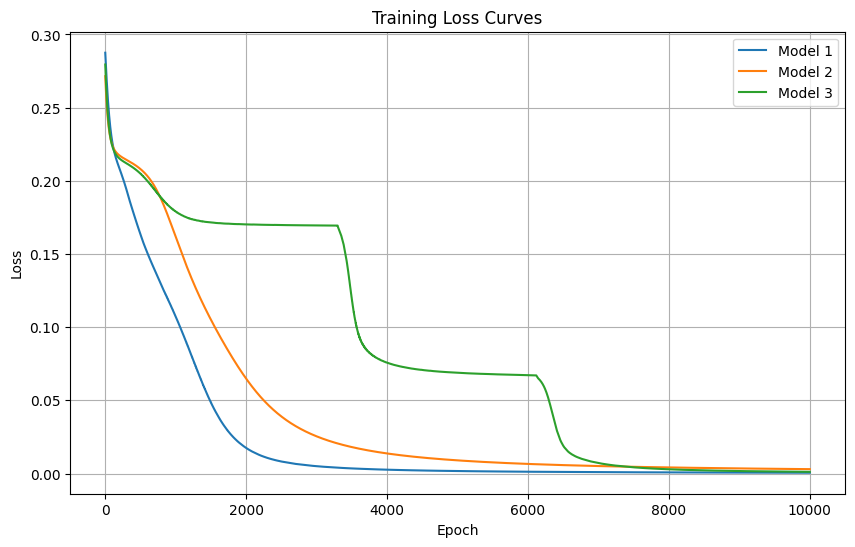

In [147]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(losses1, label='Model 1')
plt.plot(losses2, label='Model 2')
plt.plot(losses3, label='Model 3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

In [148]:
def print_model_weights(model):
    for name, param in model.named_parameters():
        print("Layer:", name)
        print("Weights:", param.data)
        print()

print("Model 1 weights:")
print_model_weights(model1)
print()

print("Model 2 weights:")
print_model_weights(model2)
print()

print("Model 3 weights:")
print_model_weights(model3)

Model 1 weights:
Layer: hidden.weight
Weights: tensor([[ 0.4582,  0.6648],
        [ 0.4987,  0.6541],
        [-0.5996, -0.5686],
        [-0.2854, -0.0635]])

Layer: hidden.bias
Weights: tensor([-0.3910, -0.2193,  0.0588, -0.5124])

Layer: output.weight
Weights: tensor([[ 0.3210, -0.1616,  0.3749, -0.2644],
        [ 0.4494,  0.4367, -0.0390, -0.3471]])

Layer: output.bias
Weights: tensor([ 0.4676, -0.3517])


Model 2 weights:
Layer: hidden.weight
Weights: tensor([[-0.3951,  0.4222],
        [-0.5127,  0.2835],
        [ 0.0370, -0.3909]])

Layer: hidden.bias
Weights: tensor([ 0.1158,  0.1446, -0.6392])

Layer: output.weight
Weights: tensor([[-0.1533, -0.4531, -0.3937],
        [-0.0262, -0.4472, -0.4649]])

Layer: output.bias
Weights: tensor([0.1397, 0.0546])


Model 3 weights:
Layer: hidden.weight
Weights: tensor([[ 0.0505,  0.0738],
        [ 0.2559,  0.3453],
        [ 0.0019,  0.6964],
        [-0.3208, -0.2224],
        [ 0.2926,  0.3382]])

Layer: hidden.bias
Weights: tensor([